In [ ]:
!pip install pycaret[full]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from pycaret.classification import *

In [ ]:
pip install mlflow

# Read DF

In [ ]:
df7=pd.read_csv("/content/drive/MyDrive/Thesis/df7_sent2.csv")

In [ ]:
df7.rt_binary=df7.rt_binary.astype('int')

In [ ]:
df7.drop(columns=['rt_binary','time','month'],inplace=True)

In [ ]:
data = df7.sample(frac=0.90, random_state=786).reset_index(drop=True)
data_unseen = df7.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (136549, 31)
Unseen Data For Predictions: (15172, 31)


In [ ]:
df7.columns

Index(['Unnamed: 0', 'user', 'content', 'follow', 'friend',
       'mention_beginning', 'mention_middle', 'mention_last',
       'hashtag_beginning', 'hashtag_middle', 'hashtag_last', 'hashtag_count',
       'mention_count', 'word_count', 'character_count', 'url_count',
       'capitalization_ratio', 'exclamation_mark_count', 'question_mark_count',
       'emoji_count', 'average_word_length', 'punctuation_count',
       'stopword_count', 'rt_multi', 'partofday_afternoon',
       'partofday_evening', 'partofday_latenight', 'partofday_morning',
       'sentiment_negative', 'sentiment_neutral', 'sentiment_positive'],
      dtype='object')

In [ ]:
num=['follow', 'friend', 'hashtag_count', 'mention_count', 'word_count',
       'character_count', 'url_count', 'capitalization_ratio',
       'exclamation_mark_count', 'question_mark_count', 'emoji_count',
       'average_word_length', 'punctuation_count', 'stopword_count']

In [ ]:
multi = setup(data=data,
             target = 'rt_multi',
             ignore_features = ['Unnamed: 0','content',"user"],
             fold = 10,
             fix_imbalance = True,
              use_gpu = True,
             numeric_features = num,
             normalize=True,
             session_id=123,
             experiment_name = 'df7_multi'
             )

,Description,Value
0,Session id,123
1,Target,rt_multi
2,Target type,Multiclass
3,Target mapping,"0: 0, 1-100: 1, 100-1000: 2, 1000-10000: 3, 10000 - more: 4"
4,Original data shape,"(136549, 31)"
5,Transformed data shape,"(256315, 28)"
6,Transformed train set shape,"(215350, 28)"
7,Transformed test set shape,"(40965, 28)"
8,Ignore features,3
9,Numeric features,14


In [ ]:
top3 = compare_models(n_select = 3, include=["xgboost","catboost","lightgbm"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8183,0.9351,0.8183,0.8148,0.8162,0.6985,0.6988,3.1440
lightgbm,Light Gradient Boosting Machine,0.8178,0.9355,0.8178,0.8160,0.8165,0.6979,0.6981,4.5250
catboost,CatBoost Classifier,0.8151,0.9341,0.8151,0.8112,0.8129,0.6935,0.6937,6.4150


Processing:   0%|          | 0/19 [00:00<?, ?it/s]

#Xgboost

In [ ]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8221,0.9353,0.8221,0.8195,0.8203,0.7046,0.7049
1,0.8190,0.9359,0.8190,0.8146,0.8165,0.6995,0.6997
2,0.8218,0.9383,0.8218,0.8185,0.8197,0.7042,0.7045
3,0.8135,0.9350,0.8135,0.8093,0.8110,0.6901,0.6903
4,0.8155,0.9337,0.8155,0.8125,0.8137,0.6940,0.6942
5,0.8160,0.9345,0.8160,0.8127,0.8141,0.6948,0.6949
6,0.8202,0.9366,0.8202,0.8163,0.8177,0.7012,0.7016
7,0.8196,0.9352,0.8196,0.8151,0.8170,0.7003,0.7006
8,0.8187,0.9333,0.8187,0.8153,0.8168,0.6995,0.6997


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_xgboost=tune_model(xgboost,fold=5,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8189,0.9347,0.8189,0.8132,0.8156,0.6989,0.6991
1,0.8197,0.9366,0.8197,0.8138,0.8164,0.7005,0.7007
2,0.8160,0.9339,0.8160,0.8114,0.8135,0.6948,0.6949
3,0.8210,0.9362,0.8210,0.8152,0.8176,0.7024,0.7027
4,0.8171,0.9326,0.8171,0.8121,0.8143,0.6964,0.6966
Mean,0.8185,0.9348,0.8185,0.8131,0.8155,0.6986,0.6988
Std,0.0018,0.0014,0.0018,0.0013,0.0015,0.0027,0.0028


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
bagged_xgboost= ensemble_model(tuned_xgboost, method = 'Bagging',fold=5,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8203,0.9353,0.8203,0.8155,0.8176,0.7016,0.7018
1,0.8197,0.9371,0.8197,0.8142,0.8166,0.7004,0.7006
2,0.8187,0.9348,0.8187,0.8143,0.8163,0.6994,0.6995
3,0.8222,0.9365,0.8222,0.8166,0.8190,0.7045,0.7048
4,0.8203,0.9341,0.8203,0.8161,0.8179,0.7021,0.7023
Mean,0.8203,0.9356,0.8203,0.8153,0.8175,0.7016,0.7018
Std,0.0011,0.0011,0.0011,0.0010,0.0010,0.0017,0.0018


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# LIGHTGBM

In [ ]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8199,0.9354,0.8199,0.8187,0.8189,0.7014,0.7016
1,0.8163,0.9355,0.8163,0.8138,0.8146,0.6951,0.6953
2,0.8267,0.9390,0.8267,0.8244,0.8251,0.7123,0.7125
3,0.8150,0.9348,0.8150,0.8128,0.8134,0.6930,0.6932
4,0.8124,0.9346,0.8124,0.8122,0.8119,0.6895,0.6896
5,0.8175,0.9355,0.8175,0.8158,0.8164,0.6977,0.6978
6,0.8222,0.9371,0.8222,0.8198,0.8206,0.7051,0.7053
7,0.8173,0.9356,0.8173,0.8153,0.8159,0.6969,0.6971
8,0.8187,0.9341,0.8187,0.8167,0.8175,0.6998,0.6999


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lightgbm=tune_model(lightgbm,fold=5,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8218,0.9365,0.8218,0.8173,0.8193,0.7043,0.7044
1,0.8227,0.9382,0.8227,0.8176,0.8199,0.7058,0.7059
2,0.8191,0.9360,0.8191,0.8150,0.8169,0.7001,0.7002
3,0.8230,0.9380,0.8230,0.8174,0.8199,0.7060,0.7062
4,0.8198,0.9356,0.8198,0.8156,0.8175,0.7015,0.7016
Mean,0.8213,0.9369,0.8213,0.8166,0.8187,0.7035,0.7037
Std,0.0016,0.0011,0.0016,0.0011,0.0013,0.0024,0.0024


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
bagged_lightgbm= ensemble_model(tuned_lightgbm, method = 'Bagging',fold=5,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8226,0.9372,0.8226,0.8181,0.8201,0.7057,0.7058
1,0.8223,0.9388,0.8223,0.8169,0.8193,0.7050,0.7051
2,0.8214,0.9368,0.8214,0.8175,0.8192,0.7041,0.7041
3,0.8232,0.9387,0.8232,0.8184,0.8204,0.7066,0.7067
4,0.8205,0.9358,0.8205,0.8165,0.8183,0.7029,0.7030
Mean,0.8220,0.9375,0.8220,0.8175,0.8195,0.7048,0.7050
Std,0.0009,0.0011,0.0009,0.0007,0.0007,0.0013,0.0013


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# Catboost

In [ ]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8149,0.9332,0.8149,0.8112,0.8128,0.6933,0.6935
1,0.8141,0.9342,0.8141,0.8101,0.8119,0.6917,0.6918
2,0.8207,0.9368,0.8207,0.8165,0.8183,0.7028,0.7030
3,0.8121,0.9338,0.8121,0.8072,0.8093,0.6880,0.6883
4,0.8108,0.9333,0.8108,0.8080,0.8092,0.6867,0.6868
5,0.8140,0.9344,0.8140,0.8105,0.8120,0.6917,0.6918
6,0.8181,0.9358,0.8181,0.8141,0.8158,0.6984,0.6986
7,0.8178,0.9348,0.8178,0.8135,0.8154,0.6977,0.6978
8,0.8126,0.9326,0.8126,0.8088,0.8105,0.6897,0.6898


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_catboost=tune_model(catboost,fold=5,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7951,0.9214,0.7951,0.7988,0.7962,0.6622,0.6628
1,0.8000,0.9240,0.8000,0.8030,0.8008,0.6700,0.6703
2,0.7952,0.9218,0.7952,0.7995,0.7967,0.6627,0.6629
3,0.7956,0.9214,0.7956,0.7991,0.7964,0.6627,0.6634
4,0.7932,0.9205,0.7932,0.7978,0.7948,0.6601,0.6607
Mean,0.7958,0.9218,0.7958,0.7996,0.7970,0.6636,0.6640
Std,0.0023,0.0012,0.0023,0.0018,0.0020,0.0034,0.0033


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
bagged_catboost= ensemble_model(tuned_catboost, method = 'Bagging',fold=5,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8159,0.9342,0.8159,0.8120,0.8137,0.6947,0.6948
1,0.8181,0.9354,0.8181,0.8138,0.8156,0.6981,0.6983
2,0.8151,0.9343,0.8151,0.8117,0.8133,0.6938,0.6939
3,0.8150,0.9357,0.8150,0.8105,0.8125,0.6932,0.6933
4,0.8155,0.9328,0.8155,0.8116,0.8133,0.6944,0.6946
Mean,0.8159,0.9345,0.8159,0.8119,0.8137,0.6948,0.6950
Std,0.0011,0.0010,0.0011,0.0011,0.0010,0.0017,0.0017


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# Blending

In [ ]:
# Blend Lightgbm, xgboost and catboost
blend_ensemble=blend_models(estimator_list=[bagged_xgboost,bagged_lightgbm,bagged_catboost],optimize='Recall',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8218,0.9366,0.8218,0.8172,0.8192,0.7044,0.7045
1,0.8214,0.9383,0.8214,0.8163,0.8185,0.7035,0.7037
2,0.8193,0.9364,0.8193,0.8154,0.8171,0.7004,0.7005
3,0.8217,0.9381,0.8217,0.8165,0.8188,0.7040,0.7042
4,0.8203,0.9352,0.8203,0.8159,0.8178,0.7022,0.7024
Mean,0.8209,0.9369,0.8209,0.8163,0.8183,0.7029,0.7030
Std,0.0010,0.0012,0.0010,0.0006,0.0007,0.0014,0.0014


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

#Evaluation

In [ ]:
evaluate_model(bagged_lightgbm) #AUC

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(bagged_lightgbm) #Confusion Matrix

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

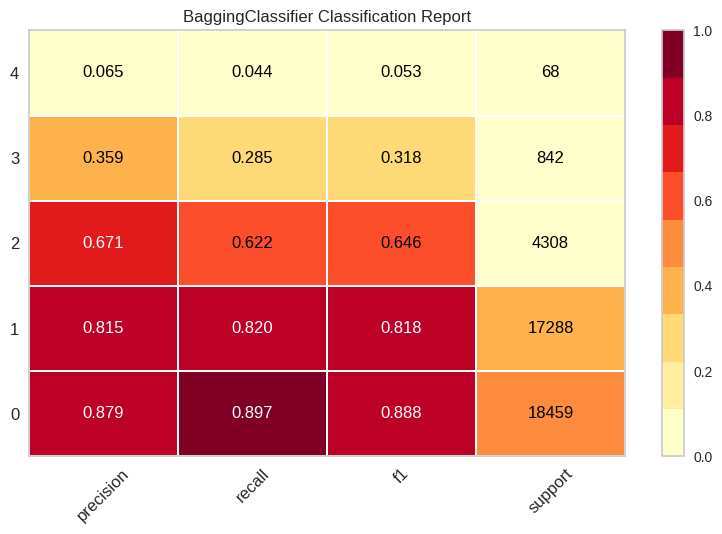

In [ ]:
plot_model(bagged_lightgbm, plot = 'class_report')

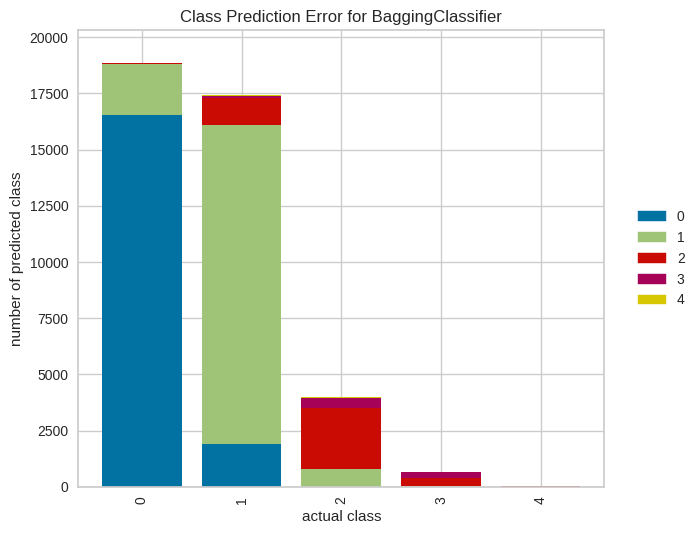

In [ ]:
plot_model(bagged_lightgbm, plot = 'error')

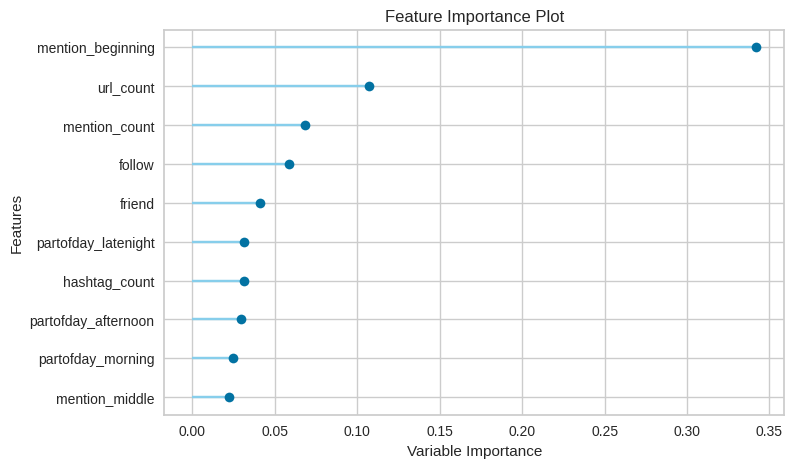

In [ ]:
plot_model(tuned_xgboost, plot = 'feature')

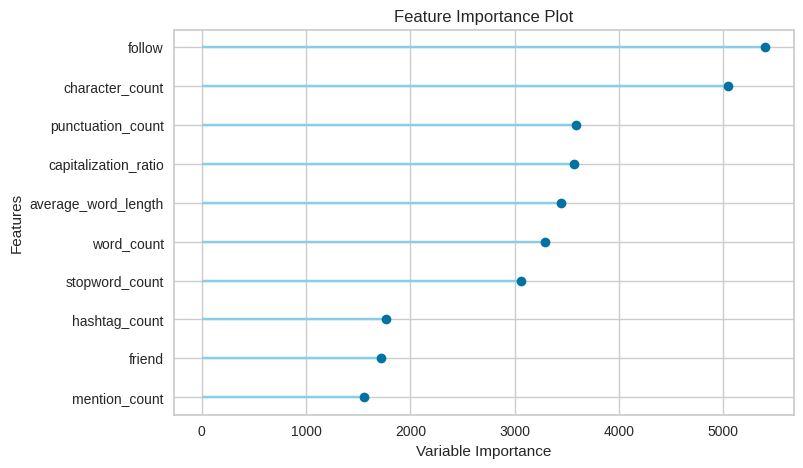

In [ ]:
plot_model(tuned_lightgbm, plot = 'feature')

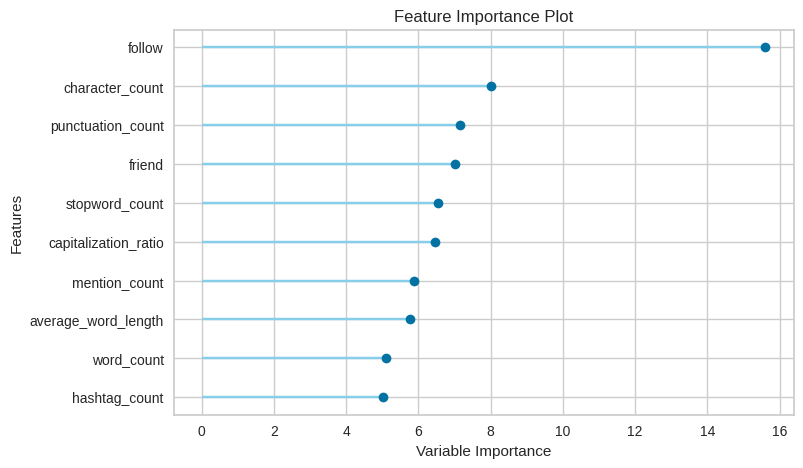

In [ ]:
plot_model(tuned_catboost, plot = 'feature')

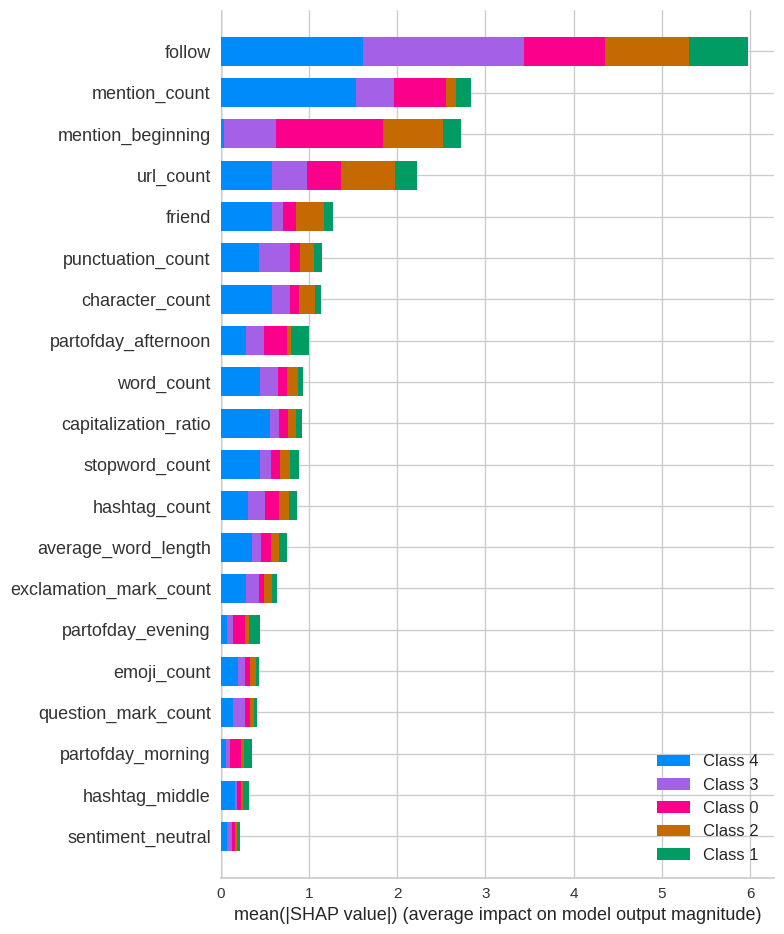

In [ ]:
interpret_model(tuned_xgboost)

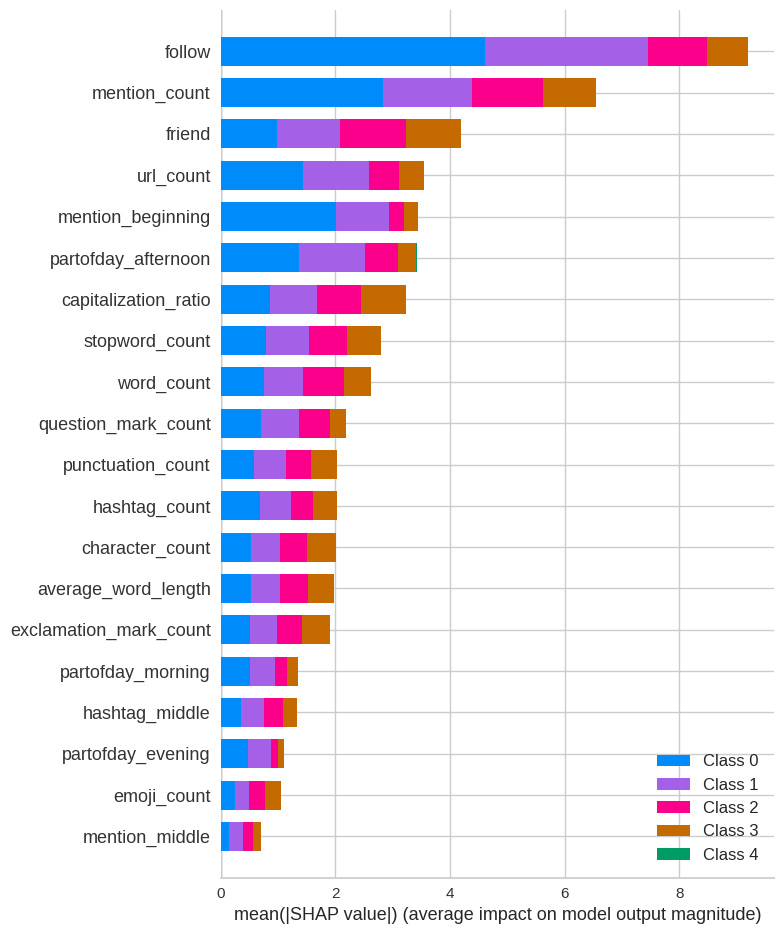

In [ ]:
interpret_model(tuned_catboost)

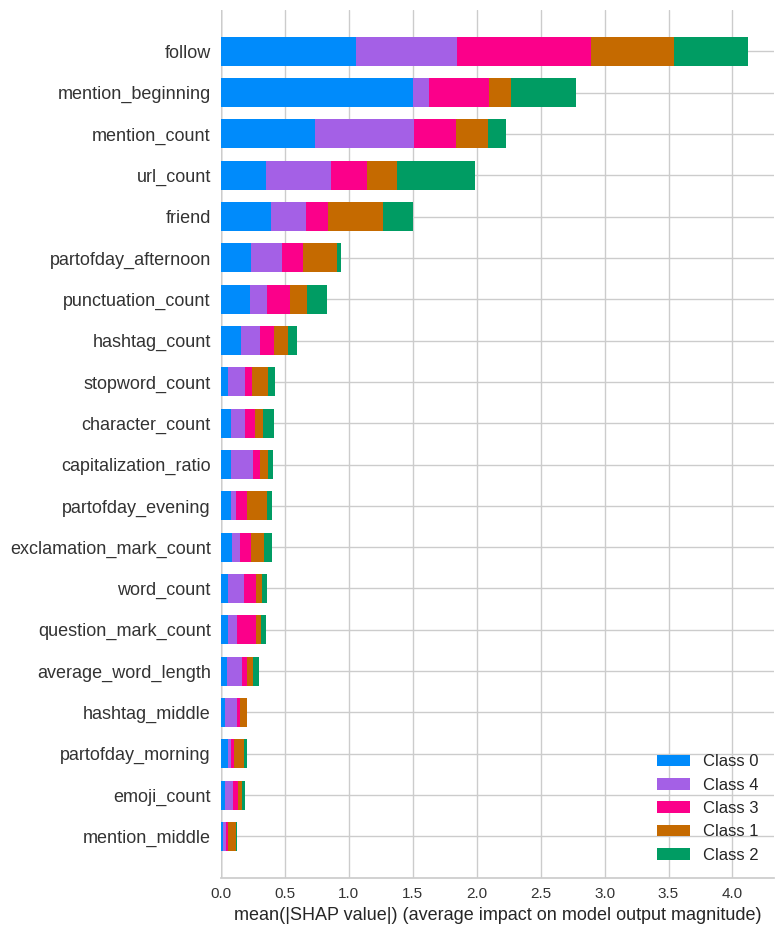

In [ ]:
interpret_model(tuned_lightgbm)

# Predict on test/ hold-out sample

In [ ]:
predict_model(xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8171,0.9349,0.8171,0.8137,0.8149,0.6962,0.6965


In [ ]:
predict_model(tuned_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8180,0.9356,0.8180,0.8126,0.8149,0.6975,0.6977


,follow,friend,mention_beginning,mention_middle,mention_last,hashtag_beginning,hashtag_middle,hashtag_last,hashtag_count,mention_count,...,partofday_afternoon,partofday_evening,partofday_latenight,partofday_morning,sentiment_negative,sentiment_neutral,sentiment_positive,rt_multi,prediction_label,prediction_score
47040,674935.0,439.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1-100,0.9495
93582,410975.0,1243.0,0,1,0,0,0,1,1,1,...,1,0,0,0,0,1,0,1,1-100,0.7659
30399,10012730.0,108.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,3,100-1000,0.6967
28658,21437914.0,2252.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,2,100-1000,0.7759
10685,6691875.0,347.0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0.8731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107779,21437916.0,2252.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,3,100-1000,0.5302
105090,541919.0,23450.0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0.9527
101468,541920.0,23450.0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0.9543
66062,6691874.0,347.0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0.8685


In [ ]:
predict_model(bagged_xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8200,0.9360,0.8200,0.8151,0.8172,0.7010,0.7012


In [ ]:
predict_model(catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8136,0.9335,0.8136,0.8095,0.8112,0.6906,0.6908


In [ ]:
predict_model(tuned_catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8136,0.9335,0.8136,0.8095,0.8112,0.6906,0.6908


,follow,friend,mention_beginning,mention_middle,mention_last,hashtag_beginning,hashtag_middle,hashtag_last,hashtag_count,mention_count,...,partofday_afternoon,partofday_evening,partofday_latenight,partofday_morning,sentiment_negative,sentiment_neutral,sentiment_positive,rt_multi,prediction_label,prediction_score
47040,674935.0,439.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1-100,0.9210
93582,410975.0,1243.0,0,1,0,0,0,1,1,1,...,1,0,0,0,0,1,0,1,1-100,0.8976
30399,10012730.0,108.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,3,100-1000,0.7091
28658,21437914.0,2252.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,2,100-1000,0.7879
10685,6691875.0,347.0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0.8398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107779,21437916.0,2252.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,3,1000-10000,0.7160
105090,541919.0,23450.0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0.9545
101468,541920.0,23450.0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0.9536
66062,6691874.0,347.0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0.8664


In [ ]:
predict_model(bagged_catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8155,0.9343,0.8155,0.8113,0.8131,0.6937,0.6939


In [ ]:
predict_model(lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8172,0.9347,0.8172,0.8155,0.8159,0.6969,0.6971


In [ ]:
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8205,0.9362,0.8205,0.8164,0.8182,0.7021,0.7023


In [ ]:
predict_model(bagged_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8218,0.9369,0.8218,0.8178,0.8196,0.7044,0.7045


In [ ]:
predict_model(blend_ensemble);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8206,0.9367,0.8206,0.8162,0.8181,0.7022,0.7024


# Finalize Model for Deployment

In [ ]:
final_xgboost = finalize_model(xgboost) #1

In [ ]:
final_tuned_xgboost = finalize_model(tuned_xgboost) #2

In [ ]:
final_bagged_xgboost= finalize_model(bagged_xgboost) #3

In [ ]:
final_lightgbm = finalize_model(lightgbm) #4

In [ ]:
final_tuned_lightgbm = finalize_model(tuned_lightgbm) #5

In [ ]:
final_bagged_lightgbm = finalize_model(bagged_lightgbm) #6

In [ ]:
final_catboost = finalize_model(catboost) #7

In [ ]:
final_tuned_catboost = finalize_model(tuned_catboost) #8

In [ ]:
final_bagged_catboost= finalize_model(bagged_catboost) #9

In [ ]:
final_blend_ensemble = finalize_model(blend_ensemble) #13

In [ ]:
final_best = finalize_model(best)

#Predict on unseen data

In [ ]:
unseen_predictions_1 = predict_model(final_xgboost, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9312,0,0.9312,0.9309,0.9303,0.8301,0.8301


In [ ]:
unseen_predictions_2 = predict_model(final_tuned_xgboost, data=data_unseen);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9350,0,0.9350,0.9349,0.9343,0.8397,0.8397


In [ ]:
unseen_predictions_3 = predict_model(final_bagged_xgboost, data=data_unseen); #

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.9353,0,0.9353,0.9354,0.9346,0.8404,0.8405


In [ ]:
unseen_predictions_4 = predict_model(final_lightgbm, data=data_unseen); #

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9284,0,0.9284,0.9285,0.9272,0.8239,0.8239


In [ ]:
unseen_predictions_5 = predict_model(final_tuned_lightgbm, data=data_unseen); #

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9307,0,0.9307,0.9307,0.9294,0.8294,0.8294


In [ ]:
unseen_predictions_6 = predict_model(final_bagged_lightgbm, data=data_unseen); #best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.9302,0,0.9302,0.9301,0.9289,0.8279,0.8279


In [ ]:
unseen_predictions_7 = predict_model(final_catboost, data=data_unseen); #  only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9312,0,0.9312,0.9314,0.9304,0.8306,0.8306


In [ ]:
unseen_predictions_8 = predict_model(final_tuned_catboost, data=data_unseen); #

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9312,0,0.9312,0.9314,0.9304,0.8306,0.8306


In [ ]:
unseen_predictions_9 = predict_model(final_bagged_catboost, data=data_unseen); #

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.9318,0,0.9318,0.9318,0.9311,0.8321,0.8321


In [ ]:
unseen_predictions_13 = predict_model(final_blend_ensemble, data=data_unseen); #  0.9224	0.9526	0.8527	0.8701	0.8613	0.8074	0.8075

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9326,0,0.9326,0.9328,0.9317,0.8340,0.8340


In [ ]:
unseen_predictions_1

,Unnamed: 0,user,content,follow,friend,mention_beginning,mention_middle,mention_last,hashtag_beginning,hashtag_middle,...,partofday_afternoon,partofday_evening,partofday_latenight,partofday_morning,sentiment_negative,sentiment_neutral,sentiment_positive,rt_multi,prediction_label,prediction_score
0,136549,Roku,Sunday Night is Football Night. \n\nStream #GB...,227234.0,1780.0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1-100,0.8631
1,136550,Roku,75 years ago today: #Casablanca premiered in N...,227234.0,1780.0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,1-100,0.9643
2,136551,Roku,ICYMI: Here's every single title coming to (an...,227234.0,1780.0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,1-100,0.8534
3,136552,Roku,👯 Get your groove on with these 5 FREE music c...,227234.0,1780.0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1-100,0.8207
4,136553,Roku,Are you ready for some football? 🏈\n\nHere's h...,227234.0,1780.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1-100,0.7934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15167,151716,Roku,@aPieceof_BDG So sorry to hear that! Anything ...,227234.0,1780.0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0.9889
15168,151717,Roku,@AlexSummerfield You should get a response wit...,227234.0,1780.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0.9822
15169,151718,Roku,"#HappyNewYear, streamers! What's first on your...",227234.0,1780.0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,1-100,0.9305
15170,151719,Roku,Frozen was the most searched for movie using R...,227234.0,1780.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1-100,0.9341


# Save Model

In [ ]:
save_model(final_bagged_lightgbm,'/content/drive/MyDrive/Thesis/final_bagged_lightgbm_07-03')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['follow', 'friend',
                                              'hashtag_count', 'mention_count',
                                              'word_count', 'character_count',
                                              'url_count',
                                              'capitalization_ratio',
                                              'exclamation_...
                                                             min_child_weight=0.001,
                                                             min_split_gain=0.4,
                                                             n_estimators=90,
        

In [ ]:
load_final_bagged_lightgbm = load_model('/content/drive/MyDrive/Thesis/final_bagged_lightgbm_07-03')

Transformation Pipeline and Model Successfully Loaded
